# Plot time series

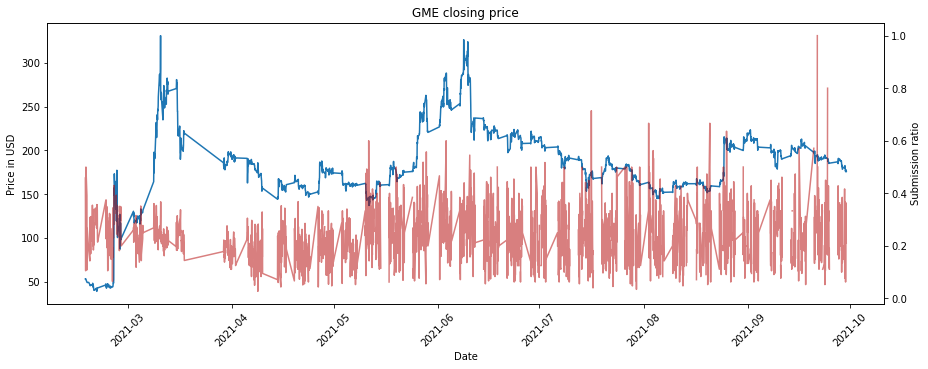

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_csv('df4.csv')
df['time'] = df['time'].astype(str)
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
# df.set_index('time').resample('60Min').first().reset_index()

flair = df['Diamond Hands']

fig = plt.figure(figsize=(15, 7))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df['close'], label='close')
plt.title('GME closing price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) 
plt.gca().xaxis.set_tick_params(rotation = 45)

axis_2 = top.twinx()
axis_2.set_ylabel('Submission ratio')
axis_2.plot(flair, color='#b30000', alpha=0.5)

# axis_2.set_xlim(left=pd.Timestamp("2021-02-02 00:00:00"), right=pd.Timestamp("2021-04-30 00:00:00"))

# plt.show()


In [2]:
df.head()
for col in df.columns:
    print(col)

returns
Number_of_Submissions
Due Diligence
Fluff
Diamond Hands
News
Discussion
Hedge Fund Tears
Memes
Provocative
YOLO
Charity
Question
Mod Announcement
Art and Media
meaningless
Knowledge
Social Media
open
high
low
close
volume
Time
Month
Quarter


 # Augmented Dickey Fuller Test

In [3]:
# Setup and Import data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from numpy import log

df = pd.read_csv('df4.csv')
df['time'] = pd.to_datetime(df['time'])

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Diamond Hands'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.160520
p-value: 0.000000


In [4]:
df = df[['time', 
         'volume',
         'Number_of_Submissions',
         'close',
         'Due Diligence',
         'Fluff',
         'Diamond Hands',
         'News',
         'Discussion',
         'Hedge Fund Tears',
         'Memes',
         'Provocative',
         'YOLO',
         'Charity',
         'Question',
         'Art and Media',
         'Knowledge',
         'Social Media',
        ]]# pick variables
#df = df[['time','open','Diamond Hands']]
df.head()

,time,volume,Number_of_Submissions,close,Due Diligence,Fluff,Diamond Hands,News,Discussion,Hedge Fund Tears,Memes,Provocative,YOLO,Charity,Question,Art and Media,Knowledge,Social Media
0,2021-02-16 10:00:00,10059,24,53.20,0.166667,0.083333,0.458333,0.041667,0.166667,0.041667,0.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-16 11:00:00,8664,18,53.21,0.294118,0.058824,0.235294,0.058824,0.294118,NaN,0.058824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-16 12:00:00,11754,20,53.01,0.315789,NaN,0.105263,0.052632,0.473684,0.052632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-16 13:00:00,56140,26,53.24,0.160000,0.160000,0.440000,NaN,0.120000,0.040000,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-16 14:00:00,94780,20,52.40,NaN,0.050000,0.500000,0.100000,0.150000,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# the following snipet transforms the data into period representation based on hourly interval
from sktime.forecasting.model_selection import temporal_train_test_split
# df = df.dropna()

df['time'] = pd.to_datetime(df['time'])
df['time'] = pd.PeriodIndex(df['time'],freq="H").to_timestamp()
df = df.set_index('time').to_period("H")
df.index

PeriodIndex(['2021-02-16 10:00', '2021-02-16 11:00', '2021-02-16 12:00',
             '2021-02-16 13:00', '2021-02-16 14:00', '2021-02-16 21:00',
             '2021-02-16 22:00', '2021-02-16 23:00', '2021-02-17 10:00',
             '2021-02-17 18:00',
             ...
             '2021-09-29 14:00', '2021-09-29 15:00', '2021-09-29 16:00',
             '2021-09-29 17:00', '2021-09-29 18:00', '2021-09-29 19:00',
             '2021-09-29 20:00', '2021-09-29 21:00', '2021-09-29 22:00',
             '2021-09-30 00:00'],
            dtype='period[H]', name='time', length=2220, freq='H')

In [6]:
df.head()

,volume,Number_of_Submissions,close,Due Diligence,Fluff,Diamond Hands,News,Discussion,Hedge Fund Tears,Memes,Provocative,YOLO,Charity,Question,Art and Media,Knowledge,Social Media
time,,,,,,,,,,,,,,,,,
2021-02-16 10:00,10059,24,53.20,0.166667,0.083333,0.458333,0.041667,0.166667,0.041667,0.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-16 11:00,8664,18,53.21,0.294118,0.058824,0.235294,0.058824,0.294118,NaN,0.058824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-16 12:00,11754,20,53.01,0.315789,NaN,0.105263,0.052632,0.473684,0.052632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-16 13:00,56140,26,53.24,0.160000,0.160000,0.440000,NaN,0.120000,0.040000,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-16 14:00,94780,20,52.40,NaN,0.050000,0.500000,0.100000,0.150000,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# the values are in hourly intervals and some intervals are missing so we will fill those intervals 
idx = pd.period_range(min(df.index), max(df.index),freq="H")
df = df.reindex(idx, fill_value=np.nan)
df = df.fillna(method='backfill')
df = df.fillna(method="ffill")

In [8]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Diamond Hands'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.287071
p-value: 0.000000


In [9]:
# correlation map
import seaborn as sns
temp_df = df.copy()
temp_df.reset_index(drop=True, inplace=True) 
corr = temp_df.corr()
# sns.heatmap(corr)

<ipython-input-10-7a82b454a2df>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(temp_df["Diamond Hands"], model='multiplicative', freq=365)


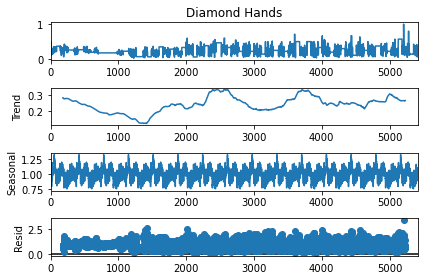

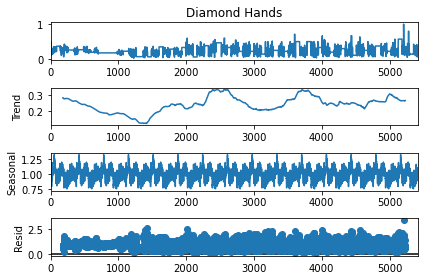

In [10]:
# seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(temp_df["Diamond Hands"], model='multiplicative', freq=365)
result.plot()

In [11]:
# split dataset into train and test
X = df[['volume',
        'close',
        'Number_of_Submissions',
        'Due Diligence',
        'Fluff',
        'News',
        'Discussion',
        'Hedge Fund Tears',
        'Memes',
        'Provocative',
        'YOLO',
        'Charity',
        'Question',
        'Art and Media',
        'Knowledge',
        'Social Media'
       ]]
y = df["Diamond Hands"]
y_train, y_test, X_train, X_test = temporal_train_test_split(y,X,test_size=400)

In [12]:
# train and fit model
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA
forecaster = ARIMA(order=(1, 0, 4), suppress_warnings=True, random_state=20)
# forecaster = AutoARIMA(random_state=20, suppress_warnings=True)
forecaster.fit(y_train,X_train)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5015
Model:               SARIMAX(1, 0, 4)   Log Likelihood                6137.573
Date:                Sun, 23 Jan 2022   AIC                         -12229.146
Time:                        09:10:55   BIC                         -12079.182
Sample:                    02-16-2021   HQIC                        -12176.594
                         - 09-13-2021                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0004      0.002      0.281      0.779      -0.003       0.003
volume                 3.314e-09   1.21e-09      2.739      0.006    9.43e-10    5.69e-09
close                     0.0004      0.000      3.308      0.001       0.000       0.001
Number_of_Submissions     0.0002   1.47e-05     13.875      0.000       0.000       0.000
Due Diligence            -0.1103      0.019     -5.738      0.000      -0.148      -0.073
Fluff                     0.1026      0.012      8.891      0.000       0.080       0.125
News                      0.1433      0.014     10.286      0.000       0.116       0.171
Discussion                0.0897      0.009      9.556      0.000       0.071       0.108
Hedge Fund Tears         -0.0264      0.000    -95.353      0.000      -0.027      -0.026
Memes                     0.0177      0.010      1.750      0.080      -0.002       0.038
Provocative              -0.0757      0.000   -260.297      0.000      -0.076      -0.075
YOLO                      2.3414      0.000   8327.976      0.000       2.341       2.342
Charity                   1.4579   4.78e-05   3.05e+04      0.000       1.458       1.458
Question                 -0.3515      0.000  -1519.577      0.000      -0.352      -0.351
Art and Media            -0.1999      0.000   -857.427      0.000      -0.200      -0.199
Knowledge                 1.2074   6.84e-05   1.76e+04      0.000       1.207       1.208
Social Media             -0.0192      0.002     -9.825      0.000      -0.023      -0.015
ar.L1                     0.9384      0.007    127.634      0.000       0.924       0.953
ma.L1                    -0.4826      0.010    -47.000      0.000      -0.503      -0.463
ma.L2                    -0.0444      0.011     -4.210      0.000      -0.065      -0.024
ma.L3                    -0.0168      0.011     -1.534      0.125      -0.038       0.005
ma.L4                    -0.0178      0.011     -1.675      0.094      -0.039       0.003
sigma2                    0.0051   7.09e-05     71.324      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              6466.64
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.89   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+21. Standard errors may be unstable.
"""

In [13]:
# prediction on test
from sktime.forecasting.base import ForecastingHorizon
fh_abs = ForecastingHorizon(y_test.index, is_relative=False) 

In [14]:
y_pred = forecaster.predict(X=X_test,fh=fh_abs)

In [15]:
# evaluation
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:",mean_squared_error(y_test, y_pred, squared=False))

MSE: 0.027969251170761794
RMSE: 0.16724010036699272


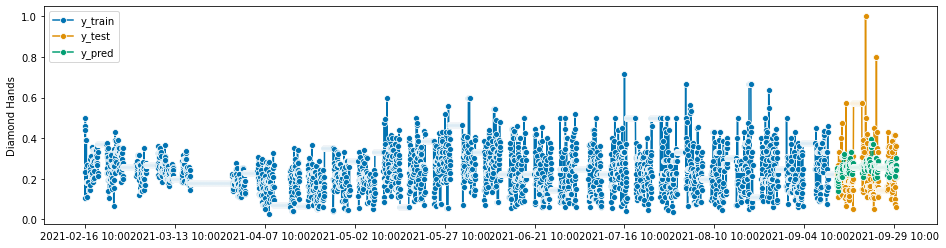

In [16]:
# plot train, test and prediction results on test set
from sktime.utils.plotting import plot_series
import seaborn as sns
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [17]:

train_df = pd.DataFrame(
    {
        "Date": y_train.index,
        "ActualTopic":y_train
    }
)

true_pred_df = pd.DataFrame({
        "Date": y_test.index,
        "ActualTopic":y_test,
        "y_pred":y_pred
})

train_df.reset_index(drop=True, inplace=True) 
train_df['Date'] = train_df['Date'].astype(str)
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_daily_df = train_df.resample('D', on='Date').sum()

true_pred_df.reset_index(drop=True, inplace=True) 
true_pred_df['Date'] = true_pred_df['Date'].astype(str)
true_pred_df['Date'] = pd.to_datetime(true_pred_df['Date'])
true_pred_daily_df = true_pred_df.resample('D', on='Date').sum()

#res_df = res_df.resample('D', on='Date').sum()

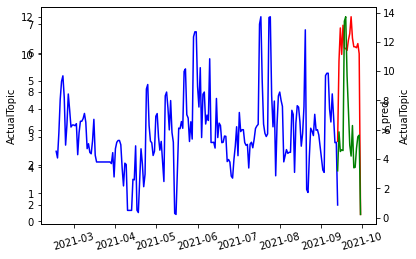

In [18]:

sns.lineplot(x=train_daily_df.index.values, y='ActualTopic', data=train_daily_df, color="b")
plt.xticks(rotation=15)
ax2 = plt.twinx()
sns.lineplot(x=true_pred_daily_df.index.values, y='y_pred', data=true_pred_daily_df, color="r", ax=ax2)
ax3 = plt.twinx()
sns.lineplot(x=true_pred_daily_df.index.values, y='ActualTopic', data=true_pred_daily_df, color="g", ax=ax3)
plt.show()


In [19]:
temp_df = pd.DataFrame(
    {
        "Date": y_test.index,
        "ActualTopic":y_test,
        "y_pred":y_pred
    }
)


In [20]:
temp_df.reset_index(drop=True, inplace=True) 
temp_df['Date'] = temp_df['Date'].astype(str)
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
daily_df = temp_df.resample('D', on='Date').sum()

In [21]:
daily_df.head()

,ActualTopic,y_pred
Date,,
2021-09-13,3.191980,2.841587
2021-09-14,5.849270,5.693182
2021-09-15,4.508002,6.873319
2021-09-16,4.628817,5.932425
2021-09-17,4.573384,6.968983


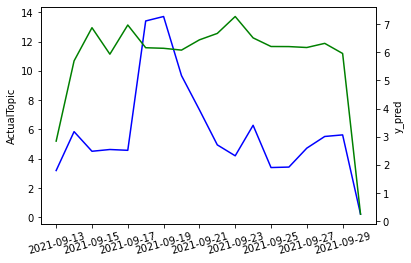

In [22]:
#hourly interval
sns.lineplot(x=daily_df.index.values, y='ActualTopic', data=daily_df, color="b")
plt.xticks(rotation=15)
ax2 = plt.twinx()
sns.lineplot(x=daily_df.index.values, y='y_pred', data=daily_df, color="g", ax=ax2)
plt.show()
